## Homework 2

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np
import pygraphviz
import matplotlib.colors as mcolors
import scipy.sparse
import utils

In [2]:
pip install networkx==2.7


Note: you may need to restart the kernel to use updated packages.


### Question 1



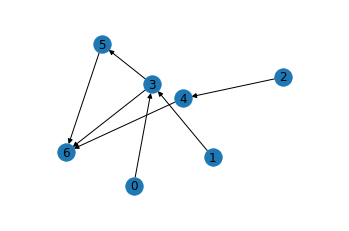

In [5]:
#Consider a directed graph with no cycles or self-loops: explain why for any $k>0$ the matrix $A^k$ has its diagonal 
#equal to zero.
#This code is from the Networkx #documentation and is only for #example purposes https://networkx.org/documentation/latest/auto_examples/basic/plot_simple_graph.html
A = nx.DiGraph([(0, 3), (1, 3), (2, 4), (3, 5), (3, 6), (4, 6), (5, 6)])

nx.draw_networkx(A )

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [6]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

In [7]:
A = nx.adjacency_matrix(A)
A.todense()

/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_24430/4081137626.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(A)


matrix([[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1],
        [0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0]])

In [8]:
#Consider an undirected graph with no self-loop. Why is the diagonal of $\bm A^2$ equal to the degree sequence?


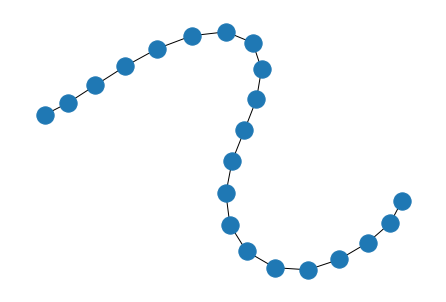

In [9]:
#Suppose you have a tree with 20 nodes. What is the dimension of its incidence matrix $\bm B$?
C = nx.balanced_tree(1,20)
nx.draw(C)

### Question 2
Max-Flow:Python/NetworkX question Consider a group of N friends, indexed by i ∈ [0,1,...,N − 1], on a road trip. Suppose that each person paid for various group expenditures throughout the course of the trip. Some of the friends spent more than their share of the total (denoted by T), and naturally, some paid less than their share. At the end of the trip, those who are in the deficit need to settle the balance with the others, so that each of them pay exactly T/N.

In [10]:
#Choose N = 10 and set the total expenditure over the course of the trip to T = 1000 · N .
N =10
T = 1000 * N

print('We set N to ', N,'and we set T to ', T)

We set N to  10 and we set T to  10000


In [11]:
#Generate a vector of individual expenditures according to a multinomial distribution with N 
#using the following script: amounts spent = numpy.random.multinomial(T, pvals = np.ones(N) / N)
#Verify that the sum of all the elements in the amounts spent array is T .

amounts_spent = np.random.multinomial(T, pvals = np.ones(N) / N)

print('We verify that the sum of all elements in the array is ', amounts_spent.sum())

We verify that the sum of all elements in the array is  10000


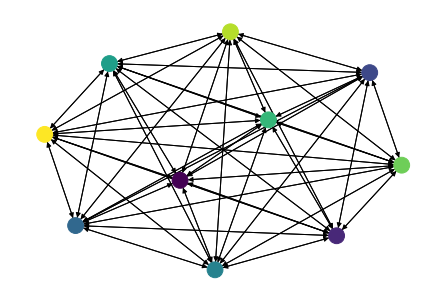

In [12]:
#Generate a complete graph among the friends with edge capacity set to ∞ for all edges.

G = nx.complete_graph(N, nx.DiGraph(capacity='inf'))

nx.draw(G, node_color=range(N), node_size=250, cmap=plt.cm.viridis_r)

In [42]:
#Identify the nodes that (1) need to pay (i.e., T /N − amounts spent[i] > 0) and (2) those
#that need to receive money (i.e., T /N − amounts spent[i] ≤ 0) to balance the books.
to_pay = {}
to_receive = {}
for i,val in enumerate(amounts_spent):
    if  T/N- val > 0:
        to_pay[i] =  (T/N - val)
    else:
        to_receive[i] = (val - T/N)
        
print('The nodes that need to pay are: ',*to_pay.keys(),'and the nodes that need to receive are: ', *to_receive.keys())
        


The nodes that need to pay are:  1 2 8 9 and the nodes that need to receive are:  0 3 4 5 6 7


#### Build the following flow network:

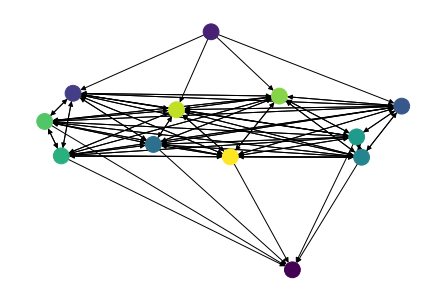

In [61]:
#1. Introduce a source node s and connect it to the nodes in the former set with edge 
#capacity equal to their individual balance (equal to T /N − amounts spent[i]).

G.add_node('s')

for key,value in to_pay.items():
    G.add_edge('s',key, capacity = value)
nx.draw(G, node_color=range(len(G)), node_size=250, cmap=plt.cm.viridis_r)

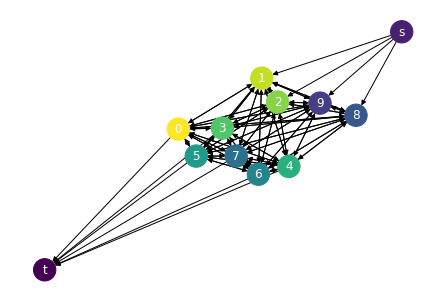

In [62]:
#2. Introduce a target node t and connect each node in the latter group
#to t with edge capacity equal to their individual balance (equal to amounts spent[i] − T /N ).

G.add_node('t')

for key,value in to_receive.items():
    G.add_edge(key, 't', capacity = value)
nx.draw(G, node_color=range(len(G)), with_labels = True, font_color= 'w', node_size=500, cmap=plt.cm.viridis_r)


In [63]:
#Plot the flow network. You can use the flow layout
#the method in the attached script file to get a flow layout for this graph.

utils.flow_layout(G)

{8: array([-1.    , -0.5625]),
 1: array([-1.    , -0.1875]),
 2: array([-1.    ,  0.1875]),
 9: array([-1.    ,  0.5625]),
 0: array([ 0.5       , -0.53571429]),
 't': [1.5, 5.551115123125783e-17],
 3: array([ 0.5       , -0.21428571]),
 4: array([ 0.5       , -0.05357143]),
 5: array([0.5       , 0.10714286]),
 6: array([0.5       , 0.26785714]),
 7: array([0.5       , 0.42857143]),
 's': [-2.0, 5.551115123125783e-17]}

In [64]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 's', 't'))

In [40]:
G.edges()

OutEdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 't'), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 't'), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 't'), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (5, 8), (5, 9), (5, 't'), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (6, 8), (6, 9), (6, 't'), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 8), (7, 9), (7, 't'), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), ('s', 1), ('s', 2), ('s', 8), ('s', 9)])

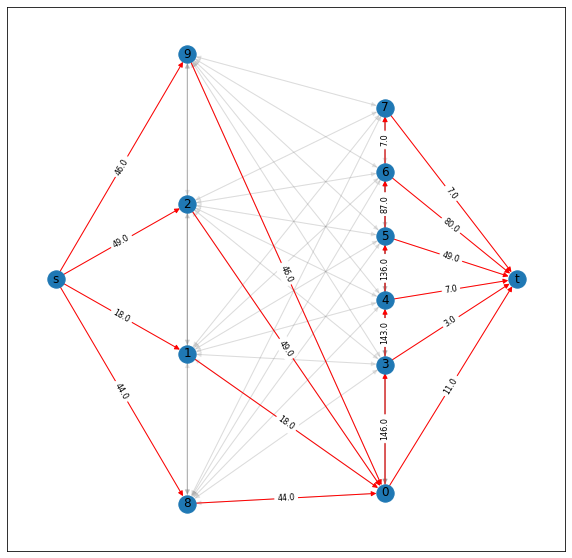

In [127]:
#If you run the Max-Flow algorithm, it can be shown that each flow represents the set of transactions 
#that need to take place to balance the books. Use the max-flow algorithm to find the transactions 
#required to settle up the balances, and verify whether the books were balanced using the flow.
#Useful methods: networkx.maximum flow.
#Useful methods: Use draw flow from the attached script file to draw the flow network with the flows highlighted.

flowVal, flowDict = nx.maximum_flow(G, "s", "t", capacity="capacity")
utils.draw_flow(G, flowDict=flowDict, fig_kwargs={"figsize":(10, 10)}, nx_kwargs={"font_size": 8})

In [121]:
# [i['t'] for i in flowDict.values() if 't' in i.keys()]

[11.0, 3.0, 7.0, 49.0, 80.0, 7.0]

In [128]:
flowDict

{0: {1: 0, 2: 0, 3: 146.0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 't': 11.0},
 1: {0: 18.0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 2: {0: 49.0, 1: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 3: {0: 0, 1: 0, 2: 0, 4: 143.0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 't': 3.0},
 4: {0: 0, 1: 0, 2: 0, 3: 0, 5: 136.0, 6: 0, 7: 0, 8: 0, 9: 0, 't': 7.0},
 5: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 6: 87.0, 7: 0, 8: 0, 9: 0, 't': 49.0},
 6: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 7: 7.0, 8: 0, 9: 0, 't': 80.0},
 7: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 8: 0, 9: 0, 't': 7.0},
 8: {0: 44.0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 9: 0},
 9: {0: 46.0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0},
 's': {1: 18.0, 2: 49.0, 8: 44.0, 9: 46.0},
 't': {}}

In [129]:
#Empty list to store t node values
lst= []

#Go through flowDict for t node values and append to the list
for i in flowDict.values():
    if 't' in i.keys() :
        lst.append(i['t'])

print(lst)

[11.0, 3.0, 7.0, 49.0, 80.0, 7.0]


In [130]:
#Empty list to store s node values
lss= []

#Go through flowDict for s node values and append to the list
for i in flowDict['s'].values():
    lss.append(i)


In [131]:
#Return true or false if the sum of s node values equals the sum of t node values
sum(lss)==sum(lst)

True